In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import zscore
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import  MultinomialNB, BernoulliNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [2]:
def Acc(testSet, predictSet):
    current = 0
    for i in range(len(testSet)):
        if testSet[i] == predictSet [i]:
            current +=1
    return (current/float(len(testSet)))* 100

In [3]:
df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 546.9 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [6]:
df['Experience'] = df.Experience.map(lambda x: (x * (-1)) if x < 0 else x)

In [7]:
df = df.drop ('ID', axis = 1)
df = df.drop ('ZIP Code', axis = 1)
df_X = df.drop('Personal Loan', axis = 1)
df_y = df['Personal Loan']

C:\Users\admin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\admin\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


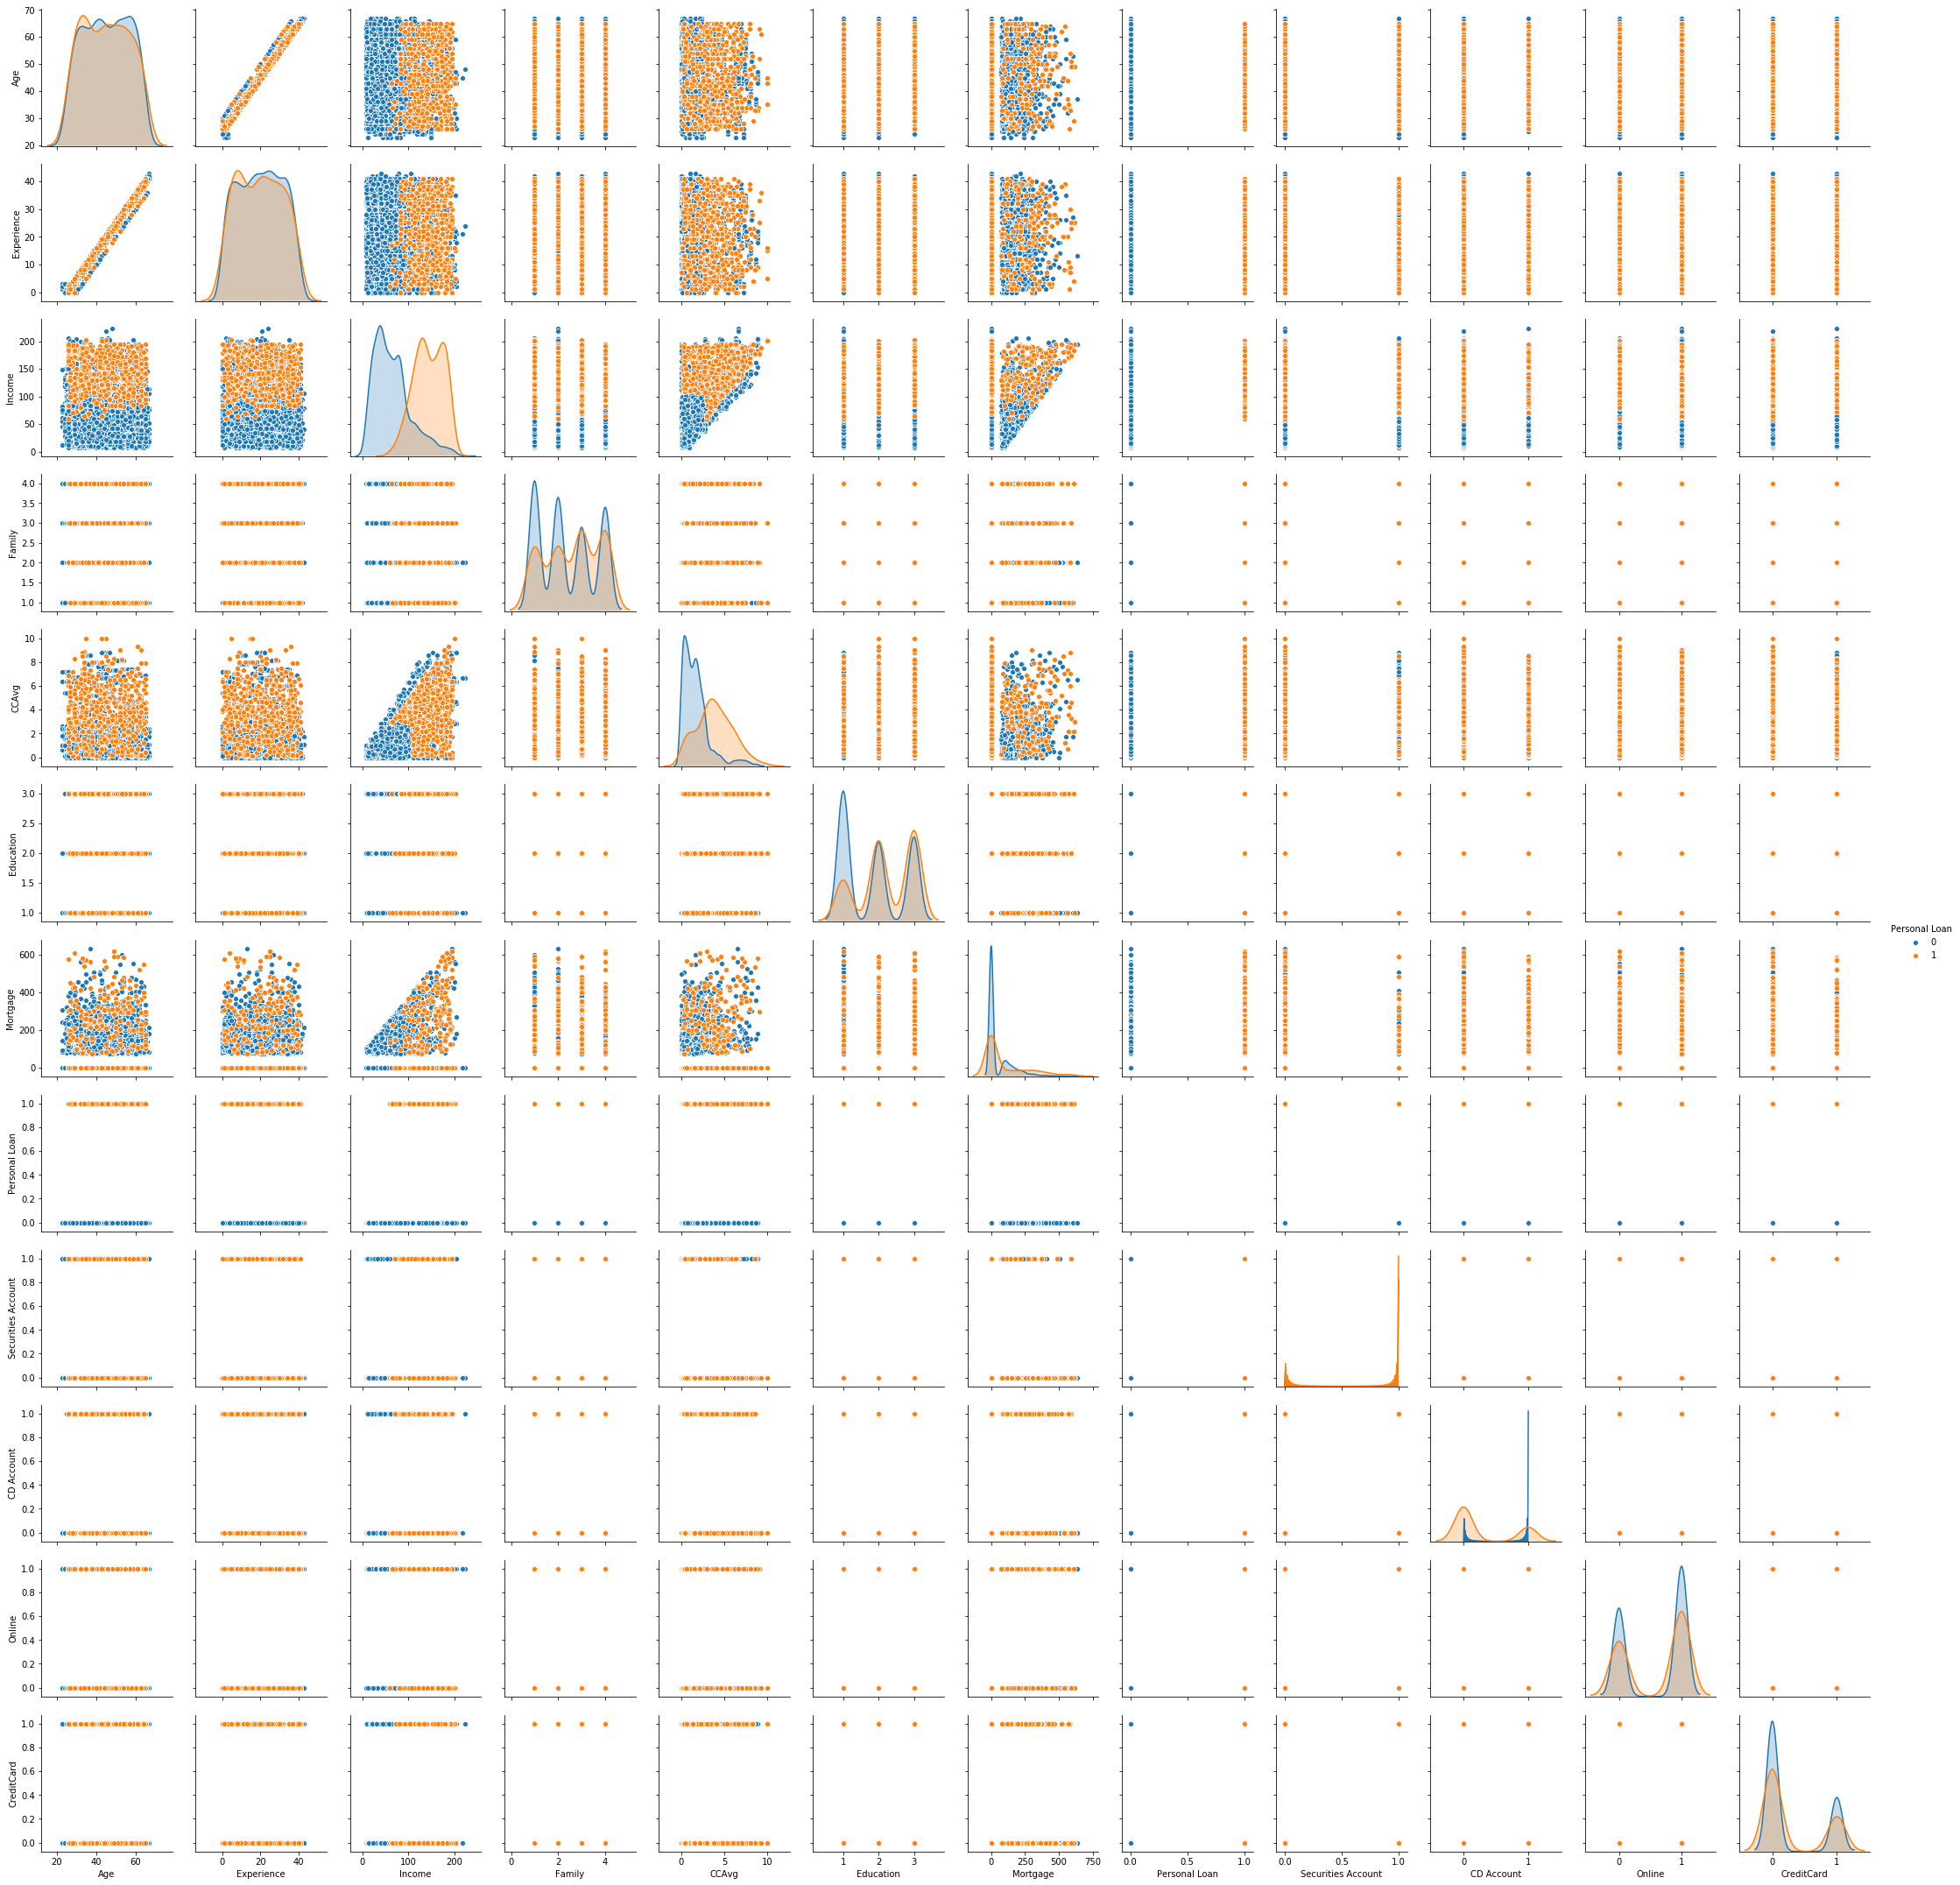

In [8]:
sns.pairplot(df, hue = 'Personal Loan')

In [8]:
df = zscore(df)

In [9]:
X = np.array(df_X)
y = np.array(df_y)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [11]:
model = LogisticRegression()

In [12]:
model.fit(X_train, y_train)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [13]:
y_predict = model.predict(X_test)

In [14]:
print (confusion_matrix(y_test, y_predict))

[[1334   17]
 [  65   84]]


In [15]:
model1 = model.score(X_train, y_train)
model12 = model.score(X_test, y_test)
error1 = model1 - model12
print("Error in LR model is: ", error1)

Error in LR model is:  0.0060952380952380425


In [16]:
print('Accuracy of Logistic Regression model is ', round(Acc(y_test, y_predict), 2))

Accuracy of Logistic Regression model is  94.53


In [18]:
clf = GaussianNB()

In [19]:
clf.fit (X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [20]:
y_predict = clf.predict(X_test)

In [21]:
print (confusion_matrix(y_test, y_predict))

[[1228  123]
 [  65   84]]


In [22]:
model2 = clf.score(X_train, y_train)
model22 = clf.score(X_test, y_test)
error2 = model2 - model22
print("Error in Gussian Naive-Bayes model is: ", error2)

Error in Gussian Naive-Bayes model is:  0.01533333333333331


In [23]:
print('Accuracy of Gaussian NB classifier model is ', round(Acc(y_test, y_predict),2))

Accuracy of Gaussian NB classifier model is  87.47


In [24]:
clf2 = MultinomialNB()

In [25]:
clf2.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [26]:
y_predict = clf2.predict(X_test)

In [27]:
print(confusion_matrix(y_test, y_predict))

[[1036  315]
 [  49  100]]


In [28]:
model3 = clf2.score(X_train, y_train)
model32 = clf2.score(X_test, y_test)
error3 = model3 - model32
print("Error in Multinomial Naive-Bayes model is: ", error3)

Error in Multinomial Naive-Bayes model is:  0.008952380952380934


In [29]:
print('Accuracy of Multinomial NB classifier model is ', round(Acc(y_test, y_predict),2))

Accuracy of Multinomial NB classifier model is  75.73


In [30]:
clf3 = BernoulliNB()

In [31]:
clf3.fit(X_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [32]:
y_predict = clf3.predict(X_test)

In [33]:
print(confusion_matrix(y_test, y_predict))

[[1316   35]
 [ 126   23]]


In [34]:
model4 = clf3.score(X_train, y_train)
model42 = clf3.score(X_test, y_test)
error4 = model4 - model42
print("Error in Bernoulli Naive-Bayes model is: ", error4)

Error in Bernoulli Naive-Bayes model is:  0.004761904761904745


In [35]:
print("Accuracy of Bernoulli NB classifier model is ", round (Acc(y_test, y_predict),2 ))

Accuracy of Bernoulli NB classifier model is  89.27


In [36]:
# For k = 3

knn3 = KNeighborsClassifier(n_neighbors = 3)
knn3.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [37]:
y_predict = knn3.predict(X_test)

In [38]:
print(confusion_matrix(y_test, y_predict))

[[1301   50]
 [  94   55]]


In [39]:
model5 = knn3.score(X_train, y_train)
model52 = knn3.score(X_test, y_test)
error5 = model5 - model52
print("Error in KNN model for k=3 is ", error5)

Error in KNN model for k=3 is  0.05114285714285716


In [40]:
print("Accuracy for KNN, k=3 is ", round (Acc(y_test, y_predict), 2 ))

Accuracy for KNN, k=3 is  90.4


In [41]:
#For k = 5

knn5 = KNeighborsClassifier(n_neighbors = 5)
knn5.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [42]:
y_predict = knn5.predict(X_test)

In [43]:
print(confusion_matrix(y_test, y_predict))

[[1306   45]
 [  94   55]]


In [44]:
model6 = knn5.score(X_train, y_train)
model62 = knn5.score(X_test, y_test)
error6 = model6 - model62
print("Error in KNN model for k=5 is ", error6)

Error in KNN model for k=5 is  0.02866666666666673


In [45]:
print("Accuracy for KNN, k=5 is ", round(Acc(y_test, y_predict), 2))

Accuracy for KNN, k=5 is  90.73


In [46]:
# For k = 9

knn9 = KNeighborsClassifier(n_neighbors = 9)
knn9.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=9, p=2,
           weights='uniform')

In [47]:
y_predict = knn9.predict(X_test)

In [48]:
print(confusion_matrix (y_test, y_predict))

[[1315   36]
 [  99   50]]


In [49]:
model7 = model.score(X_train, y_train)
model72 = model.score(X_test, y_test)
error7 = model7 - model72
print("Error in KNN model for k=9 is ", error7)

Error in KNN model for k=9 is  0.0060952380952380425


In [50]:
print("Accuracy for KNN, k =9 is ", round(Acc(y_test, y_predict), 2))

Accuracy for KNN, k =9 is  91.0
